# Modeling Titrations

This exercise will introduce you to the ideas needed to interpret mathematical models of chemical systems. We will use the classic titration as our example.

We can model any chemical system with math and then see if the model fits our experimental data. If we obtain a good fit we may be able to determine the parameters of the system with some accuracy. Let us examine a simple titration of acetic acid.

*Note:  You can perform this exercise using Maple or Matlab, both of which are freely available to UPEI students via a site license. I am presenting this using Python because it is free to everyone for all time.*

## Python as a Calculator

First let us consider the basics. You should explore my notes on [Python as a calculator](https://blinkletter.github.io/MathWithPython/start.html) and then work through the [example of weak acid dissociation](https://blinkletter.github.io/MathWithPython/E1_The_ICE_Table_in_Python.html) found on those pages.

Download the Jupyter Notebook for [example of weak acid dissociation](https://blinkletter.github.io/MathWithPython/E1_The_ICE_Table_in_Python.html) and solve the following problem: What is the pH of the solution created by adding 2.0 mL of acetic acid to 500 mL of pure water? 

In [1]:
import sympy
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

GitHub_Data_Location = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/data/"

## A Simple Titration

Let us take that as a starting point. The pH of the solution is 2.96 (did you use the density of acetic acid to get the correct mass for the calculations?). We need a function that will model the concentration of hydronium ion and the amount of base added as we titrate.

### The Acid Equilibrium

As we learned in the [example of weak acid dissociation](https://blinkletter.github.io/MathWithPython/E1_The_ICE_Table_in_Python.html), the acid equilibrium of acetic acid can be expressed as...

$$AcOH \rightleftharpoons H^+ + AcO^-$$  
$$K_a = \frac{[H^+][AcO^-]}{[AcOH]}$$

We will use the more general form below for all future equations...

$$HA \rightleftharpoons H + A$$  
$$K_a = \frac{[H][A]}{[AH]}$$


### Doing Things Backwards

In all the math that follows you will see that we are building equations that give us the amount of the basic or acidic form of the acid being titrated, not the concentration of hydronium, \[H\]. This is because the math is simpler with this approach.

### Titrating with Strong Base

The total concentration of acetic acid, $[A]_T$, in the solution is the combined concentrations of the acid and the conjugate base. 

$$[A]_T = [A] + [AH]$$

Combining this with the equation for $K_a$ described above will give us an expression for the amount of the basic form as a fraction of the total amount of the acetic acid that was added.

$$[A] = [A]_T\frac{K_a}{K_a+[H]}$$

We are titrating with a strong base, like NaOH.  We assume that it is a much stronger base that the acetate ion and the amount of hydroxide, $B_T$, added will be represented by the amount of acetate ion, $[A]$, and free hydroxide, $[OH]$.

$$B_T = [OH] + [A]$$

Substitiute in the expression for $[A]$ above and we have...

$$B_T = [OH] + [A]_T\frac{K_a}{K_a+[H]}$$

We can express $[OH]$ as a function of $[H]$...

$$[OH] = \frac{K_W}{[H]}$$

Therefore...

$$B_T = \frac{K_W}{[H]} + [A]_T\frac{K_a}{K_a+[H]}$$

We can make a list of pH values (remember that $pH = -\log{[H]}$) and calculate a list of corresponding values for base added, $B_T$. We can then plot $pH$ vs. $B_T$ to get a model titration curve. The following code will calculate these two lists of values.

In [2]:
import numpy as np

KW = 10 ** (- 14)       # Ionic product of water
Ka = 10 ** (- 4.76)     # Ka value for acetic acid
At = 0.06994            # concentration of acetic acid added (in moles/L)

pH_list = np.linspace(2.96, 11, 100)      # a list of 100 pH values
H_list = 10 ** (- pH_list)                # a list of [H] values calculted from the pH list

B_list = KW / H_list + At * Ka / (Ka + H_list)   # a list of calculated values for base added to reach the value given in the list of H_list values.

### The Titration Plot for Acetic Acid

The following code will now plot the results. We start at $pH = 2.96$. This values comes from our calculation for adding 2.0 mL of acetic acid to 500 mL of water for an initial concentration of $[A]_T = 0.0699 M$ We can see in the plot that the endpoint occurs very near that value for concentration of NaOH added.

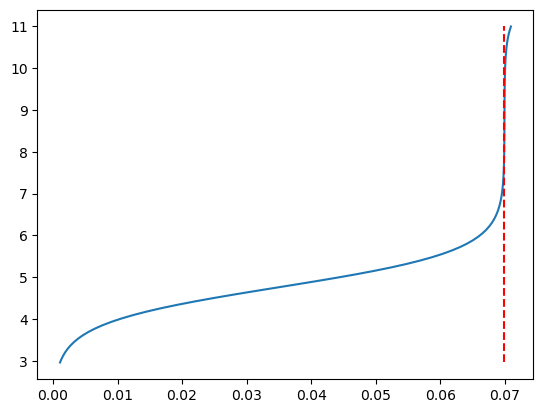

In [3]:
from matplotlib import pyplot as plt

x = B_list
y = pH_list

plt.plot(x, y)
plt.vlines(At, np.min(pH_list), np.max(pH_list), colors="red", linestyles='dashed')
plt.show()

### Phenolphthalein Indicator

We know that phenolphthalein indicator changes from colorless to pink at pH 8.5. What is the amount of base needed to reach that pH value? We can just do the math with the code below.

Take note of how vertical the function is at the endpoint. pH changes rapidly in neutral water with the tiniest addition of acid or base. Once we have fully titrated the acetic acid there is nothing to prevent the pH from rising past the $pK_a$ value of the phenolphthalein indicator.

The amount of phenolphthalein present is very small and it has no significant effect on the titration. As long as your pH change is rapid in the region of pH = 8 to 9 then this indicator will work well.

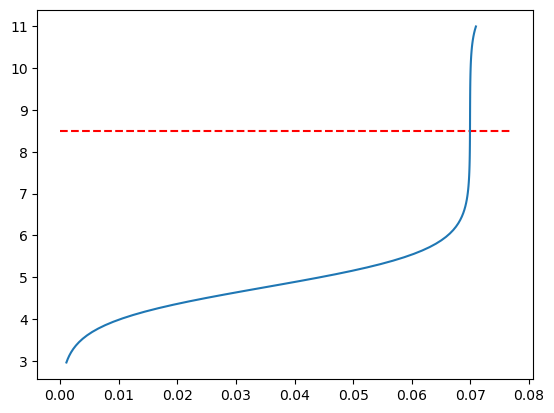

The endpoint is reached when the concentration of NaOH added is... 
0.069922 moles/L


In [4]:
pH = 8.3
H = 10 **(- pH)
Ka = 10 ** (- 4.76)      # Ka value for acetic acid

B = KW/H + At*Ka/(Ka+H)  # This is the equation we used to make the plot above

# Plot the titration curve with the phenolphthalein pKa indicated by a dashed line

plt.hlines(8.5, 0, B * 1.1, colors="red", linestyles='dashed')
plt.plot(B_list, pH_list)
plt.show()

# print the calculated endpoint when pH = Pka of phenolphthalein

print("The endpoint is reached when the concentration of NaOH added is... ")
print(f"{B:.6f} moles/L" )



## Not So Simple

We are not always starting with a pure solution of acetic acid and water. Imagine I begin with an unknown mixture of acetic acid and sodium acetate. I want to get the total concentration of acetate by titration. The mixture is already partly titrated if significant amounts of the base and the acid forms are present.

I will add enough strong acid (e.g. HCl) to take the pH well below the $pK_a$ of acetic acid.  At pH 1.0 the acetic acid is 99.8% in its acidic form. We will also have excess acid. So the amount of titrant will be increased by the amount of strong acid.

$$B_T + [H] = [OH] + [A] $$

$$B_T = [OH] - [H] + [A] $$

$$B_T = \frac{K_W}{[H]} - [H] + [A]_T\frac{K_a}{K_a+[H]}$$

The code below implements this model.

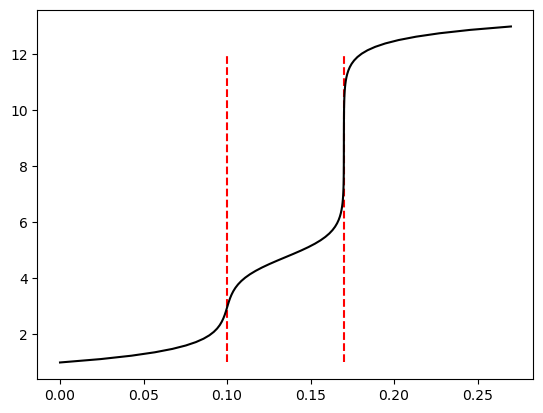

In [5]:
import numpy as np
from matplotlib import pyplot as plt

KW = 10 ** (- 14)       # Ionic product of water
Ka = 10 ** (- 4.76)     # Ka value for acetic acid
At = 0.06994            # concentration of acetic acid added (in moles/L)


pH_list = np.linspace(1, 13, 100)   # a list of 100 pH values
H_list = 10**(-pH_list)             # a list of [H] values calculted from the pH list

Init_H = 10**-pH_list[0]            # The starting [H], represents amount of additional strong 
                                    #  acid added and assumes that the tritrated acid was added 
                                    #  in its fully acidic form.
        
B_list = KW/H_list + At*Ka/(Ka+H_list) - H_list + Init_H   #Init_H added so that the titration starts at zero




plt.vlines(Init_H, 1, 12, colors="red", linestyles='dashed')
plt.vlines(Init_H + At, 1, 12, colors="red", linestyles='dashed')
plt.plot(B_list, pH_list, "k-")
plt.show()

The vertical lines in the plot above denote the equivalence points for titrating away the 0.1 moles/L of string acid that was added to bring the pH down to 1.0 and the 0.070 moles/L of aceric acid that was present. This is still a simple system and was modelled by adding together the titration curves of water and of acetic acid.

## A Polyprotic Acid

Many biological molecules have more than one acidic proton with a $p\rm K_a$ value in the range of a typical aqueous titration. 

Let us consider the titration of phosphoric acid by a very strong base. Phosphoric acid has three acidic protons.

$$ H_3PO_4 \rightleftharpoons H_2PO_4^{-} \rightleftharpoons HPO_4^{2-} \rightleftharpoons PO_4^{3-} $$

And there are three corresponding $\rm Ka$ values for the acid equilibrium if phosphoric acid.

$$ K_{a_1} = \frac{[H^+][H_2PO_4^{-}]}{[H_3PO_4]}\; \; \;K_{a_2} = \frac{[H^+][HPO_4^{2-}]}{[H_2PO_4^{-}]}\; \; \;K_{a_3} = \frac{[H^+][PO_4^{3-}]}{[HPO_4^{2-}]}$$

And the total amount pf phosphate in the system does not change with the titration so we can say that...

$$ [P]_T = [H_3PO_4] + [H_2PO_4^{-}] + [HPO_4^{2-}] + [PO_4^{3-}] $$

From these statements we can derive the following relationship for the amount of base added to acheive a given $p \rm H$ value.

$$B_T = \frac{K_W}{[H]}- [H] + [P]_T\frac{K_{a_1}[H^+]^2 + 2K_{a_1}K_{a_2}[H^+] + 3K_{a_1}K_{a_2}K_{a_3}}{[H^+]^3+ K_{a_1}[H^+]^2 + K_{a_1}K_{a_2}[H^+] + K_{a_1}K_{a_2}K_{a_3}} $$

The details of deriving this equation are given in the **Acid/base Equilibria Tutorial** document. The code and plot for the model is shown below.

This equation could be written as a sum of the titration terms of the polyprotic acid as shown below. This is exactly the same equation as above except the terms in the polyvalent equation have not been collected.  

$$B_T = \frac{K_W}{[H]} - [H] + [P]_T\left(\frac{K_{a_1}}{K_{a_1}+[H]}+\frac{K_{a_2}}{K_{a_2}+[H]}+\frac{K_{a_3}}{K_{a_3}+[H]}\right)$$

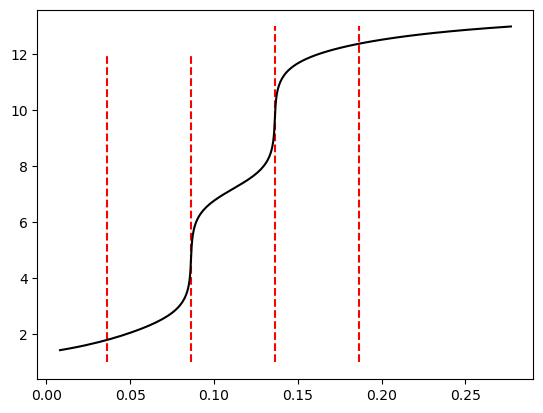

In [6]:
import numpy as np
from matplotlib import pyplot as plt

KW = 10 ** (- 14)       # Ionic product of water
Ka1 = 10 ** (- 2.15)       # Ka value for H3PO4 acid
Ka2 = 10 ** (- 7.20)       # Ka value for H2PO4 acid
Ka3 = 10 ** (- 12.35)      # Ka value for HPO4 acid
Pt = 0.05               # concentration of phosphoric acid added (in moles/L)


pH_list = np.linspace(1.44, 13, 200)   # a list of 200 pH values
H_list = 10**(-pH_list)             # a list of [H] values calculated from the pH list
H = H_list                          # For simplicity in the math expression

Init_H = 10**-pH_list[0]            # The starting [H], represents amount of additional strong 
                                    #  acid added and assumes that the tritrated acid was added 
                                    #  in its fully acidic form. \
        
B_list = Init_H  + KW/H - H + Pt   \
          * (( Ka1*H**2 )+( 2*Ka1*Ka2*H )+( 3*Ka1*Ka2*Ka3 )) \
          / (( H**3 )+( Ka1*H**2 )+( Ka1*Ka2*H )+( Ka1*Ka2*Ka3 )) 
         #Init_H added so that the titration starts at zero

#B_list = Init_H + 1*(KW/H - H) + Pt * (Ka1/(Ka1+H) + Ka2/(Ka2+H) + Ka3/(Ka3+H)) #Init_H added so that the titration starts at zero
         


plt.vlines(Init_H, 1, 12, colors="red", linestyles='dashed')
plt.vlines(Init_H + Pt, 1, 12, colors="red", linestyles='dashed')
plt.vlines(Init_H + 2*Pt, 1, 13,  colors="red", linestyles='dashed')
plt.vlines(Init_H + 3*Pt, 1, 13, colors="red", linestyles='dashed')

plt.plot(B_list, pH_list, "k-")
plt.show()

## Using the Model

Observe in the plot above that the lowest and highest $p\rm K_a$ values in phosphoric acid are not resolved. The water itself is being titrated below $p\rm H$ 2 and above $p\rm H$ 12 and this signal is added to and overwhelms the signal from the phosphoric acid. We cannot easily determine the $p\rm K_a$  values for the first and third acid dissociation by visual inspection. But we could fit experimental data to the model and see if we can determine the Ka values and the concentration.

First we will find some data reported in the literature. I obtained data from a recent paper that described the titration of 25 mL of a 0.04389 M solution of phosphoric acid using a 0.09948 M solution of NaOH. The code below will read in the data from a file.

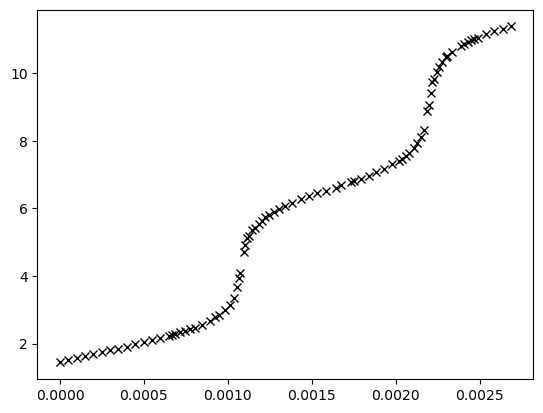

0.00109725

In [7]:
# Titration of 25 mL of H3PO4 0.04389 M with NaOH 0.09948 M (Veq1=11.03 mL; Veq2=22.06 mL)

import pandas
import numpy as np
from matplotlib import pyplot as plt

NaOH_conc = 0.09948  # moles/L

data_file = "PO4.Data.csv"
file_name = GitHub_Data_Location + data_file

df = pandas.read_csv(file_name, comment='#')

x = df["pH"]
y = df["Volume.mL"]
y = y/1000*NaOH_conc

plt.plot(y, x, "kx")
plt.show()

0.04389*.025

## Using the First Derivative

The slope of the line (the first derivative) will help identify the endpoints.

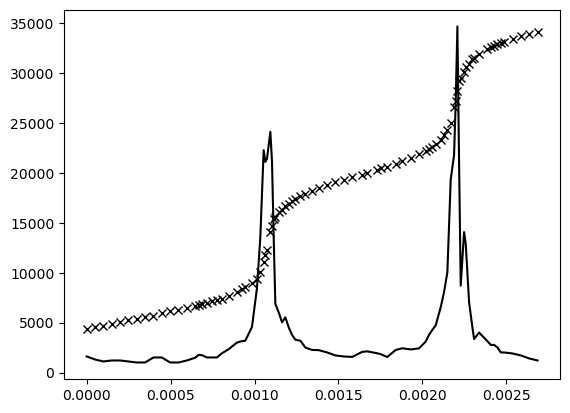

In [8]:
der = np.gradient(x,y)

plt.plot(y, x*3000, "kx")
plt.plot(y, der, "k-")

[7.17792405e-03 3.29742550e-12 2.29729339e-07]
[ -2.14400114 -11.48182501  -6.63878354]
-11.782855003516664


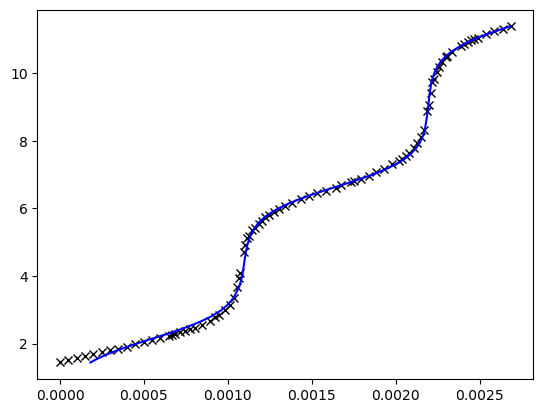

In [9]:
# Titration of 25 mL of H3PO4 0.04389 M with NaOH 0.09948 M (Veq1=11.03 mL; Veq2=22.06 mL)

import scipy
from scipy.optimize import curve_fit

import pandas
import numpy as np
from matplotlib import pyplot as plt

def titrate3(pH_list, Ka1, Ka2, Ka3):
    
    KW = 10 ** (-14)
    
    H = 10**(-pH_list)                              
    Init_H = H[0]      
    Pt = 0.00109725
    
    B_list = 0*Init_H + 0*(KW/H) - 0*H + Pt * (Ka1/(Ka1+H) + Ka2/(Ka2+H) + Ka3/(Ka3+H)) 
    #Init_H added so that the titration starts at zero
    
    return(B_list)

NaOH_conc = 0.09948  # moles/L

data_file = "PO4.Data.csv"
file_name = GitHub_Data_Location + data_file

df = pandas.read_csv(file_name, comment='#')

x = df["pH"]
y = df["Volume.mL"]

y = y/1000*NaOH_conc

plt.plot(y, x, "kx")



a, b = scipy.optimize.curve_fit(titrate3, x, y)

B_opt_list = titrate3(x,7.17792405e-03,2.29729339e-07,3.29742550e-12)

plt.plot(B_opt_list, x, "b-")

print(a)
print(np.log10(a))
print(np.log10(3.29742550e-12)-np.log10(2))

## Acetate


Index(['V_mL', 'pH'], dtype='object')
[1.53628664e-05]
[4.81352775]


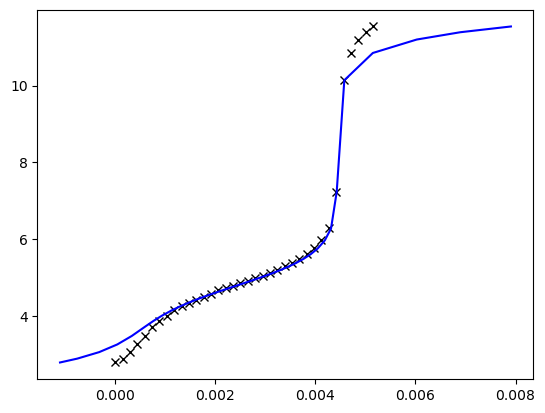

In [10]:
#  Titration with NaOH 0.4905 M, of 3.96 mmol of acetic acid plus 0.484 mmol de HCl dissolved in 200 mL of KCl 0.10 M
# from http://dx.doi.org/10.20431/2349-0403.0409002


import scipy
from scipy.optimize import curve_fit

import pandas
import numpy as np
from matplotlib import pyplot as plt

def titrate3(pH_list, Ka1):
    
    KW = 10 ** (-14)
    
    H = 10**(-pH_list)                              
    Init_H = 0.00048  # moles HCl added     
    At = 0.00396
    
    B_list = Init_H + 1*(KW/H) - 1*H + At * (Ka1/(Ka1+H))

    #Init_H added so that the titration starts at zero
    
    return(B_list)


NaOH_conc = 0.4905  # moles/L

data_file = "AcOH.Data.csv"
file_name = GitHub_Data_Location + data_file

xf = pandas.read_csv(file_name, comment='#')
print(xf.columns)

x = xf["pH"]
y = xf["V_mL"]

y = y / 1000 * NaOH_conc

plt.plot(y, x, "kx")


a, b = scipy.optimize.curve_fit(titrate3, x, y)

pKa = 10**(-4.8)
B_opt_list = titrate3(x, pKa)

plt.plot(B_opt_list, x, "b-")

print(a)
print(-np.log10(a))


# Resources

I am not a programmer, I am a user. I learned how to use Python at the most basic level and then turned to helpful resources made available by others. Along the way I made notes that I turned into some resources for myself that you may find useful as well.

**Math with Python**.  These are some pages that I made to help me learn how to perform calculations and do basic modelling with Python. [https://blinkletter.github.io/MathWithPython/start.html](https://blinkletter.github.io/MathWithPython/start.html)

**Mathematical Python**. An introduction to mathematical computing including:Jupyter notebooks, basic Python programming, and scientific computing with NumPy, SciPy and Matplotlib. [https://patrickwalls.github.io/mathematicalpython/](https://patrickwalls.github.io/mathematicalpython/)

**Scientific Computing for Chemists with Python**. Python basics with a focus on examples applicable to chemistry. [https://weisscharlesj.github.io/SciCompforChemists/intro.html](https://weisscharlesj.github.io/SciCompforChemists/intro.html)

The data for the phosphate and acetate titrations was from "Titration Error in Polyprotic Acid-Base Titrations: Applications to Titration of Vinegar, Cola Drinks and Antibiotic Batches." Julia Martín, Gloria Cañamares Marin, Agustin G. Asuero, *International Journal of Advanced Research in Chemical Science*, **2017**, *4*, 7-20. [http://dx.doi.org/10.20431/2349-0403.0409002](http://dx.doi.org/10.20431/2349-0403.0409002)

In [11]:
np.log10(0.04389)

-1.3576344191550267